# Machine Learning Data Processing

In [1]:
#%load_ext sql

import sqlalchemy

from sqlalchemy.ext.automap import automap_base

from sqlalchemy.orm import Session

from sqlalchemy import create_engine, inspect

In [3]:
import os

import pandas as pd

# import psycopg2

from matplotlib import pyplot as plt

In [4]:
host = "localhost"

database = "horseSQL"

user = "postgres"

password = "postgres"

In [5]:
engine = create_engine(f"postgresql://{user}:{password}@{host}/{database}")

conn = engine.connect()

ModuleNotFoundError: No module named 'psycopg2'

In [12]:
# ! pip install keras_tuner
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
import datetime

In [13]:
f = './Resources/horse_databases.csv'
new_df = pd.read_csv(f)
new_df.head(2)

,race_ID,Date,course,race_name,Distance_covered,Track_condition,season,race_group,race_type,Race_Money,...,age,Weight,Gear,Top_speed,sire,dam,damsire,comment,Winner,prize_money
0,RID1169-IE-05,2005-06-02,other,Sheilas Cottage (Mares) Maiden Hurdle,3200,other,5,Hurdle,Handicap,11568.0,...,5,157,t,93.0,Desert Style (IRE),Lough N Uisce (IRE),Boyne Valley,Held up - progress into mid-division halfway -...,0,852.0
1,RID1169-IE-05,2005-06-02,other,Sheilas Cottage (Mares) Maiden Hurdle,3200,other,5,Hurdle,Handicap,11568.0,...,4,150,t,79.0,Bob Back (USA),Guest Cailin (IRE),Be My Guest,Mid-division 8th approaching 3 out - 6th after...,0,0.0


In [18]:
# Drop features or data that will not contribute most to the prediction variable
new1_df = new_df.drop(['race_ID','season','sire','dam','damsire','comment','race_name','horse_name'],axis=1)
new1_df.head(5)

,Date,course,Distance_covered,Track_condition,race_group,race_type,Race_Money,Trainer,Jockey,Track_position,age,Weight,Gear,Top_speed,Winner,prize_money
0,2005-06-02,other,3200,other,Hurdle,Handicap,11568.0,other,other,3.0,5,157,t,93.0,0,852.0
1,2005-06-02,other,3200,other,Hurdle,Handicap,11568.0,other,other,5.0,4,150,t,79.0,0,0.0
2,2005-12-29,other,3600,other,Bumper,Even,10122.0,other,other,2.0,5,161,t,36.0,0,1690.5
3,2005-12-11,other,3200,other,Hurdle,Handicap,12532.0,other,other,1.0,4,161,t,33.0,1,8983.0
4,2006-04-16,other,3200,other,Hurdle,Handicap,21690.0,other,other,4.0,5,134,t,89.0,0,697.5


In [19]:
new1_df.dtypes

Date                 object
course               object
Distance_covered      int64
Track_condition      object
race_group           object
race_type            object
Race_Money          float64
Trainer              object
Jockey               object
Track_position      float64
age                   int64
Weight                int64
Gear                 object
Top_speed           float64
Winner                int64
prize_money         float64
dtype: object

In [21]:
new1_df.shape

(140439, 16)

In [22]:
new1_df.set_index('Date').head(2)

,course,Distance_covered,Track_condition,race_group,race_type,Race_Money,Trainer,Jockey,Track_position,age,Weight,Gear,Top_speed,Winner,prize_money
Date,,,,,,,,,,,,,,,
2005-06-02,other,3200,other,Hurdle,Handicap,11568.0,other,other,3.0,5,157,t,93.0,0,852.0
2005-06-02,other,3200,other,Hurdle,Handicap,11568.0,other,other,5.0,4,150,t,79.0,0,0.0


In [24]:
model_df = new1_df.iloc[0:120000, :]
model_df.head(2)

,Date,course,Distance_covered,Track_condition,race_group,race_type,Race_Money,Trainer,Jockey,Track_position,age,Weight,Gear,Top_speed,Winner,prize_money
0,2005-06-02,other,3200,other,Hurdle,Handicap,11568.0,other,other,3.0,5,157,t,93.0,0,852.0
1,2005-06-02,other,3200,other,Hurdle,Handicap,11568.0,other,other,5.0,4,150,t,79.0,0,0.0


In [25]:
cleaned_df = model_df.drop(['Date'], axis=1)

cleaned_df.head(2)

,course,Distance_covered,Track_condition,race_group,race_type,Race_Money,Trainer,Jockey,Track_position,age,Weight,Gear,Top_speed,Winner,prize_money
0,other,3200,other,Hurdle,Handicap,11568.0,other,other,3.0,5,157,t,93.0,0,852.0
1,other,3200,other,Hurdle,Handicap,11568.0,other,other,5.0,4,150,t,79.0,0,0.0


In [26]:
cleaned_positive = cleaned_df[cleaned_df['Winner']==1]
cleaned_positive.head(2)

,course,Distance_covered,Track_condition,race_group,race_type,Race_Money,Trainer,Jockey,Track_position,age,Weight,Gear,Top_speed,Winner,prize_money
3,other,3200,other,Hurdle,Handicap,12532.0,other,other,1.0,4,161,t,33.0,1,8983.0
11,other,4000,Soft,Hurdle,Handicap,14460.0,other,other,1.0,4,156,b,83.0,1,10365.0


In [27]:
cleaned_neg = cleaned_df[cleaned_df['Winner']==0].sample(n=len(cleaned_positive))
cleaned_neg.head(2)

,course,Distance_covered,Track_condition,race_group,race_type,Race_Money,Trainer,Jockey,Track_position,age,Weight,Gear,Top_speed,Winner,prize_money
37970,other,4200,other,Hurdle,Even,42300.000000,Gordon Elliott,other,3.0,7,157,tp,17.0,0,4050.0
106768,other,4300,Soft,Hurdle,Handicap,9501.647727,other,other,8.0,8,148,p,64.0,0,0.0


In [28]:
clean_df = pd.concat([cleaned_positive,cleaned_neg], axis=0)
clean_df.head(2)

,course,Distance_covered,Track_condition,race_group,race_type,Race_Money,Trainer,Jockey,Track_position,age,Weight,Gear,Top_speed,Winner,prize_money
3,other,3200,other,Hurdle,Handicap,12532.0,other,other,1.0,4,161,t,33.0,1,8983.0
11,other,4000,Soft,Hurdle,Handicap,14460.0,other,other,1.0,4,156,b,83.0,1,10365.0


In [30]:
clean_df.shape

(31282, 15)

In [74]:
# Assign X as dataframe of the features and y as a series of the outcome variable
#X = clean_df.drop("Winner", 1) 
y = clean_df.Winner # target

In [75]:
# Assign X as dataframe of the features and y as a series of the outcome variable
X = clean_df 


In [76]:
X.shape

(31282, 15)

In [77]:
y.head(2)

3     1
11    1
Name: Winner, dtype: int64

In [78]:
X.head(2)

,course,Distance_covered,Track_condition,race_group,race_type,Race_Money,Trainer,Jockey,Track_position,age,Weight,Gear,Top_speed,Winner,prize_money
3,other,3200,other,Hurdle,Handicap,12532.0,other,other,1.0,4,161,t,33.0,1,8983.0
11,other,4000,Soft,Hurdle,Handicap,14460.0,other,other,1.0,4,156,b,83.0,1,10365.0


In [101]:
X.columns.tolist()

['course',
 'Distance_covered',
 'Track_condition',
 'race_group',
 'race_type',
 'Race_Money',
 'Trainer',
 'Jockey',
 'Track_position',
 'age',
 'Weight',
 'Gear',
 'Top_speed',
 'Winner',
 'prize_money']

In [104]:
X =X[['course',
 'Distance_covered',
 'Track_condition',
 'race_group',
 'race_type',
 'Race_Money',
 'Trainer',
 'Jockey',
 'Track_position',
 'age',
 'Weight',
 'Gear',
 'Top_speed',
 'prize_money',
 'Winner']]
X

,course,Distance_covered,Track_condition,race_group,race_type,Race_Money,Trainer,Jockey,Track_position,age,Weight,Gear,Top_speed,prize_money,Winner
3,other,3200,other,Hurdle,Handicap,12532.000000,other,other,1.0,4,161,t,33.0,8983.000000,1
11,other,4000,Soft,Hurdle,Handicap,14460.000000,other,other,1.0,4,156,b,83.0,10365.000000,1
19,other,3200,Soft,Hurdle,Handicap,12050.000000,other,other,1.0,8,150,b,45.0,8637.500000,1
23,other,4000,Soft,Hurdle,Handicap,12050.000000,other,other,1.0,6,145,t,44.0,8637.500000,1
28,other,4600,other,Chase,Even,7712.000000,other,other,1.0,9,154,t,103.0,5528.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25706,other,4600,Good,Chase,Handicap,8160.000000,other,other,7.0,9,153,other,40.0,0.000000,0
67247,other,4800,Soft,Chase,Handicap,11189.772727,other,other,4.0,8,153,b,100.0,542.045455,0
20572,other,3200,other,Hurdle,Handicap,7200.000000,other,other,8.0,6,151,tp,28.0,0.000000,0
84544,other,3600,other,Hurdle,Handicap,2906.386364,other,other,2.0,7,166,tp,106.0,563.727273,0


## Feature Selection

### Pearson Correlation

<AxesSubplot:>

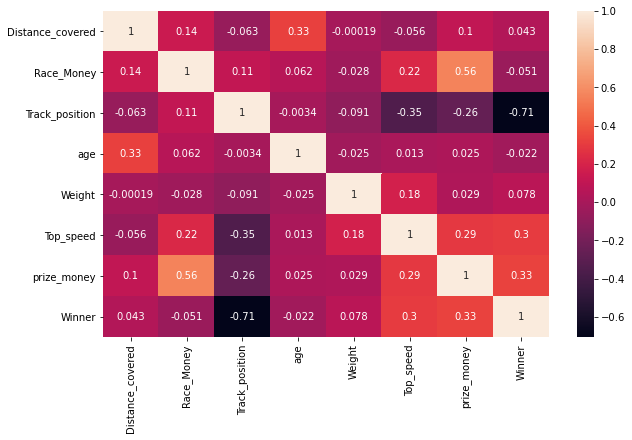

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
#Correlation matrix using Pearson Correlation
cor = X.corr()
#plotting Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cor, annot = True)

In [79]:
len(X.columns)

15

In [80]:
X.dtypes

course               object
Distance_covered      int64
Track_condition      object
race_group           object
race_type            object
Race_Money          float64
Trainer              object
Jockey               object
Track_position      float64
age                   int64
Weight                int64
Gear                 object
Top_speed           float64
Winner                int64
prize_money         float64
dtype: object

In [81]:
# Print object variable column
# Print object variable column
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'course' has 5 unique categories
Feature 'Track_condition' has 4 unique categories
Feature 'race_group' has 4 unique categories
Feature 'race_type' has 2 unique categories
Feature 'Trainer' has 3 unique categories
Feature 'Jockey' has 3 unique categories
Feature 'Gear' has 5 unique categories


In [82]:
# assign labels denoted by y to our train and test data sets
y_label = LabelEncoder().fit_transform(clean_df["Winner"])
y_label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

<AxesSubplot:>

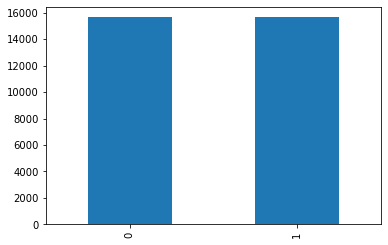

In [83]:
clean_df["Winner"].value_counts().plot(kind="bar")

In [84]:
# get_dummies for train data
X_dum = pd.get_dummies((X), drop_first=True)
X_dum.head(2)

,Distance_covered,Race_Money,Track_position,age,Weight,Top_speed,Winner,prize_money,course_Fontwell,course_Uttoxeter,...,race_group_Unknown,race_type_Handicap,Trainer_Gordon Elliott,Trainer_other,Jockey_Tom Scudamore,Jockey_other,Gear_other,Gear_p,Gear_t,Gear_tp
3,3200,12532.0,1.0,4,161,33.0,1,8983.0,0,0,...,0,1,0,1,0,1,0,0,1,0
11,4000,14460.0,1.0,4,156,83.0,1,10365.0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [85]:
X_dum.columns

Index(['Distance_covered', 'Race_Money', 'Track_position', 'age', 'Weight',
       'Top_speed', 'Winner', 'prize_money', 'course_Fontwell',
       'course_Uttoxeter', 'course_Worcester', 'course_other',
       'Track_condition_Good To Soft', 'Track_condition_Soft',
       'Track_condition_other', 'race_group_Chase', 'race_group_Hurdle',
       'race_group_Unknown', 'race_type_Handicap', 'Trainer_Gordon Elliott',
       'Trainer_other', 'Jockey_Tom Scudamore', 'Jockey_other', 'Gear_other',
       'Gear_p', 'Gear_t', 'Gear_tp'],
      dtype='object')

# Machine Learning Model

In [86]:
X_dum.head(5)

,Distance_covered,Race_Money,Track_position,age,Weight,Top_speed,Winner,prize_money,course_Fontwell,course_Uttoxeter,...,race_group_Unknown,race_type_Handicap,Trainer_Gordon Elliott,Trainer_other,Jockey_Tom Scudamore,Jockey_other,Gear_other,Gear_p,Gear_t,Gear_tp
3,3200,12532.0,1.0,4,161,33.0,1,8983.0,0,0,...,0,1,0,1,0,1,0,0,1,0
11,4000,14460.0,1.0,4,156,83.0,1,10365.0,0,0,...,0,1,0,1,0,1,0,0,0,0
19,3200,12050.0,1.0,8,150,45.0,1,8637.5,0,0,...,0,1,0,1,0,1,0,0,0,0
23,4000,12050.0,1.0,6,145,44.0,1,8637.5,0,0,...,0,1,0,1,0,1,0,0,1,0
28,4600,7712.0,1.0,9,154,103.0,1,5528.0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [87]:
from collections import Counter
counter = Counter(y)
for k, v in counter.items():
  dist = v/ len(y)*100
  print(f"Class={k}, n={v} ({dist}%)")

Class=1, n=15641 (50.0%)
Class=0, n=15641 (50.0%)


<BarContainer object of 2 artists>

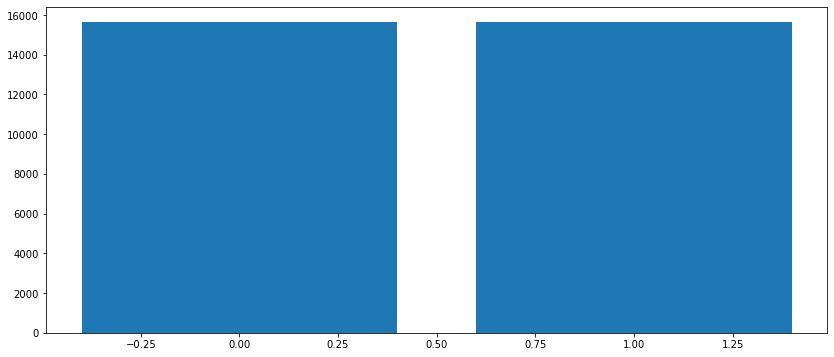

In [88]:
plt.figure(1, figsize=(14,6))
plt.bar(counter.keys(),counter.values())

In [89]:
len(X_dum.columns)

27

In [90]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size = 0.7
valid_size=0.2

train_index = int(len(X_dum)*train_size)

# First we need to sort the dataset by the desired column 
X_dum.sort_values(by = 'Winner', ascending=True, inplace=True)

df_train = X_dum[0:train_index]
df_rem = X_dum[train_index:]

valid_index = int(len(X_dum)*valid_size)

df_valid = X_dum[train_index:train_index+valid_index]
df_test = X_dum[train_index+valid_index:]

X_train, y_train = df_train.drop(columns='Winner').copy(), df_train['Winner'].copy()
X_valid, y_valid = df_valid.drop(columns='Winner').copy(), df_valid['Winner'].copy()
X_test, y_test = df_test.drop(columns='Winner').copy(), df_test['Winner'].copy()
        
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(21897, 26)
(21897,)
(6256, 26)
(6256,)
(3129, 26)
(3129,)


(None, None)

In [91]:

# Use sklearn to split the preprocessed data into a train, validate and test
#X_train, X_test, y_train, y_test = train_test_split(X_dum, y_label, train_size = 0.6, random_state=1)

In [92]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_valid_scaled = X_scaler.transform(X_valid)
X_test_scaled = X_scaler.transform(X_test)

In [93]:
X_train_scaled

array([[ 0.0798874 , -0.1477593 ,  1.04227384, ..., -0.59399982,
         1.35148566, -0.26816246],
       [-1.10990643, -0.30784976,  0.75765931, ..., -0.59399982,
         1.35148566, -0.26816246],
       [ 0.67478431, -0.36968266, -0.0961843 , ..., -0.59399982,
        -0.73992646, -0.26816246],
       ...,
       [ 0.97223277, -0.19740364, -0.9500279 , ..., -0.59399982,
         1.35148566, -0.26816246],
       [-0.81245797, -0.19740364, -0.9500279 , ..., -0.59399982,
        -0.73992646, -0.26816246],
       [ 0.0798874 , -0.02530326, -0.9500279 , ..., -0.59399982,
        -0.73992646,  3.7290828 ]])

In [94]:
X_valid_scaled

array([[-1.10990643, -0.22388062, -0.9500279 , ..., -0.59399982,
         1.35148566, -0.26816246],
       [ 0.0798874 ,  0.61759096, -0.9500279 , ..., -0.59399982,
        -0.73992646, -0.26816246],
       [-0.9611822 , -0.17092665, -0.9500279 , ..., -0.59399982,
        -0.73992646, -0.26816246],
       ...,
       [ 1.26968123,  2.62085294, -0.9500279 , ..., -0.59399982,
         1.35148566, -0.26816246],
       [ 0.37733586, -0.36968266, -0.9500279 , ...,  1.6835022 ,
        -0.73992646, -0.26816246],
       [ 0.0798874 , -0.23071142, -0.9500279 , ..., -0.59399982,
        -0.73992646, -0.26816246]])

In [127]:
X_test_scaled

array([[ 1.41840546, -0.41692471, -0.9500279 , ..., -0.59399982,
         1.35148566, -0.26816246],
       [-1.10990643, -0.21528061, -0.9500279 , ..., -0.59399982,
        -0.73992646,  3.7290828 ],
       [-1.10990643, -0.38193328, -0.9500279 , ...,  1.6835022 ,
        -0.73992646, -0.26816246],
       ...,
       [-0.9611822 , -0.38374229, -0.9500279 , ..., -0.59399982,
         1.35148566, -0.26816246],
       [ 0.0798874 , -0.3511845 , -0.9500279 , ..., -0.59399982,
         1.35148566, -0.26816246],
       [ 0.37733586, -0.40184179, -0.9500279 , ..., -0.59399982,
         1.35148566, -0.26816246]])

## Logistic Regression
1. model1 : using train and test

In [128]:
classifier = LogisticRegression(fit_intercept=True, random_state=1, max_iter = 400,verbose=0, multi_class='auto')
classifier.fit(X_train_scaled,y_train)
classifier.score(X_train_scaled,y_train)
classifier.score(X_test_scaled,y_test)

1.0

In [129]:
print(f"Training Scaled Data Score: {classifier.score(X_train_scaled,y_train)}")

print(f"Test  Scaled Data Score: {classifier.score(X_test_scaled,y_test)}")

Training Scaled Data Score: 0.999680321505229
Test  Scaled Data Score: 1.0


2. model2: using train, valid and test

In [130]:
classifier = LogisticRegression(fit_intercept=True, random_state=1, max_iter = 400,verbose=0, multi_class='auto')
classifier.fit(X_train_scaled,y_train)
classifier.score(X_train_scaled,y_train)
classifier.score(X_valid_scaled,y_valid)
classifier.score(X_test_scaled,y_test)

1.0

In [131]:
print(f"Training Scaled Data Score: {classifier.score(X_train_scaled,y_train)}")
print(f"Validation Scaled Data Score: {classifier.score(X_valid_scaled,y_valid)}")
print(f"Test  Scaled Data Score: {classifier.score(X_test_scaled,y_test)}")

Training Scaled Data Score: 0.999680321505229
Validation Scaled Data Score: 1.0
Test  Scaled Data Score: 1.0


# Decision Tree Classifier

In [133]:
model = DecisionTreeClassifier()
scores = cross_validate(model, X_valid_scaled,y_valid, cv=6, n_jobs=-1, scoring='f1_macro')

In [134]:
scores

{'fit_time': array([0.48591208, 0.48591208, 0.48591208, 0.48591208, 0.        ,
        0.        ]),
 'score_time': array([0.16629553, 0.16629553, 0.16629553, 0.16629553, 0.        ,
        0.        ]),
 'test_score': array([1., 1., 1., 1., 1., 1.])}

# RandomForestClassifier

In [53]:
model_r =RandomForestClassifier(n_estimators = 10, max_features='auto')

In [54]:
model_r.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [55]:
model_r.score(X_train,y_train)

1.0

In [56]:
model_r.score(X_test,y_test)

1.0

In [57]:
y_predicted = model_r.predict(X_test)
y_predicted

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [58]:
# Optional : using confusion matrix to confirm RandomForestClassifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted )
cm

array([[6131,    0],
       [   0, 6381]], dtype=int64)

Text(69.0, 0.5, 'Truth')

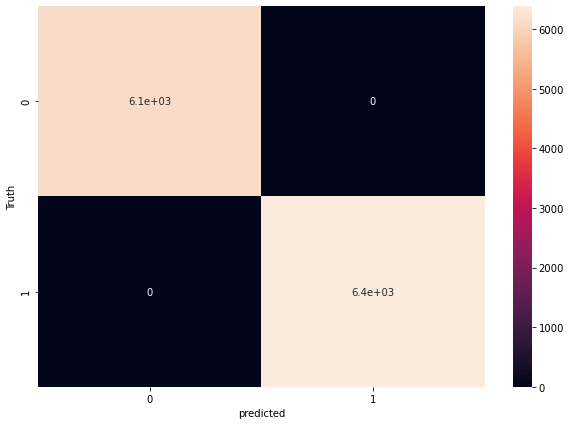

In [59]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [60]:
y_true = y_test
tn, fp, fn, tp = confusion_matrix(y_true, y_predicted).ravel()

accuracy = (tp + tn) / (tp + fp + tn + fn)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [61]:
print(metrics.classification_report(y_true, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6131
           1       1.00      1.00      1.00      6381

    accuracy                           1.00     12512
   macro avg       1.00      1.00      1.00     12512
weighted avg       1.00      1.00      1.00     12512



Can precision and recall both be 1?
Image result for what happens when precision, recall and f1 score all gives 1
In information retrieval, a perfect precision score of 1.0 means that every result retrieved by a search was relevant (but says nothing about whether all relevant documents were retrieved) whereas a perfect recall score of 1.0 means that all relevant documents were retrieved by the search (but says nothing about how ..

# Wrapper Method: Exhaustive Feature Selection

In [124]:
# Exhaustive Feature Selection
from mlxtend.feature_selection import ExhaustiveFeatureSelector
# Import algorith to evaluate features.
from sklearn.ensemble import RandomForestClassifier
# Create the ExhaustiveFeatureSelector Object
efs = ExhaustiveFeatureSelector(RandomForestClassifier(),
        min_features=4,
        max_features=8,
        scoring ='roc_auc',
        cv=2)
# fit the object to the traing data
efs = efs.fit(X, y)
# Print the selected features
selected_features = X_train.columns[lists(efs.best_idx_)]
print(selected_features)
# Print the final prediction score.
print(efs.best_score_)

ModuleNotFoundError: No module named 'mlxtend'

In [82]:
clean_df.to_csv('database_data.csv', index=False)

In [83]:
clean_df

,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
3,other,other,3200,other,5,Hurdle,Handicap,12532.000000,other,other,1.0,4,161,t,33.0,1,8983.000000
11,other,4yo+,4000,Soft,5,Hurdle,Handicap,14460.000000,other,other,1.0,4,156,b,83.0,1,10365.000000
19,other,4yo+,3200,Soft,5,Hurdle,Handicap,12050.000000,other,other,1.0,8,150,b,45.0,1,8637.500000
24,other,5yo+,4000,Soft,5,Hurdle,Handicap,12050.000000,other,other,1.0,6,145,t,44.0,1,8637.500000
29,other,5yo+,4600,other,5,Chase,Even,7712.000000,other,other,1.0,9,154,t,103.0,1,5528.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89904,other,4yo+,4800,Good,13,Hurdle,Handicap,3353.522727,other,other,7.0,8,150,t,9.0,0,0.000000
97172,other,5yo+,5000,other,13,Chase,Handicap,13414.090909,other,Richard Johnson,3.0,12,156,b,50.0,0,1517.727273
64646,other,4yo+,4000,Good,9,Hurdle,Handicap,55948.863636,other,other,4.0,5,148,p,106.0,0,3034.090909
77474,other,4yo+,4800,Good,11,Hurdle,Handicap,2906.386364,other,other,2.0,6,160,b,53.0,0,563.727273


In [84]:
clean_df.dtypes

course              object
band                object
Distance             int64
Track_condition     object
season               int64
race_group          object
race_type           object
Race_Money         float64
trainer             object
jockey              object
Track_position     float64
age                  int64
Weight               int64
gear                object
Top_speed          float64
Winner               int64
prize_money        float64
dtype: object